In [1]:
import multipsi as mtp
import numpy as np
import matplotlib.pyplot as plt
import veloxchem as vlx

bohr_to_Å = 0.529177

In [2]:
# HF calculation of H, equivalent to CI
mol_str = "H 0.0000 0.0000 0.0000"
molecule = vlx.Molecule.read_molecule_string(mol_str, units='angstrom')
molecule.set_multiplicity(2)
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz")

scf_drv = vlx.ScfUnrestrictedDriver()
scf_results = scf_drv.compute(molecule, basis)
E_H_hf = scf_drv.get_scf_energy()


# H2 scan
mol_template = """
H 0.0000 0.0000 0.0000
H 0.0000 0.0000 dist
"""
scf_drv = vlx.ScfRestrictedDriver()
ci_drv = mtp.CIDriver()

distlist = [0.5, 0.6, 0.7, 0.75, 0.8,0.9,1.0,1.2,1.5,2,2.5,3,3.5,4,4.5,5]
E_hf = []
E_FCI = []

# Scan over O-H distances
for dist in distlist:
    mol_str = mol_template.replace("dist", str(dist))
    molecule = vlx.Molecule.read_molecule_string(mol_str, units='angstrom')
    basis = vlx.MolecularBasis.read(molecule, "cc-pvdz")
    scf_results = scf_drv.compute(molecule, basis)
    
    E_hf.append(scf_drv.get_scf_energy() - 2*E_H_hf)
    
    space=mtp.OrbSpace(molecule,scf_drv.mol_orbs)
    space.fci()
    ci_results = ci_drv.compute(molecule,basis,space)
    E_FCI.append(ci_results["energies"][0] - 2*E_H_hf)
    
    # Save orbitals and densities for equilibrium value
    if dist == 0.75:
        eq_molecule = molecule
        eq_orbitals = scf_drv.mol_orbs
        eq_2density = ci_drv.get_active_2body_density(0)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Unrestricted Hartree-Fock                                       
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -0.499278403420 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -0.499278403420    0.0000000000      0.00000005      0.00000003      0.00000000                


                                                                                                                          
               *** SCF converged in 1 iterations. Time: 0.01 sec.                                                         
                                                                                                                          


               Spin-Unrestricted Hartree-Fock:                                                                            
               -------------------------------                                                                            
               Total Energy                       :       -0.4992784034 a.u.                                              
               Electronic Energy                  :       -0.4992784034 a.u.                                              
               Nuclear Repulsion Energy           :        0.0000000000 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000462 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -1.044195881437 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -1.048687184260    0.0000000000      0.03228141      0.00976213      0.00000000                


                  2        -1.048800398179   -0.0001132139      0.00075218      0.00019687      0.00838820                


                  3        -1.048800556215   -0.0000001580      0.00000986      0.00000323      0.00041723                


                  4        -1.048800556227   -0.0000000000      0.00000001      0.00000000      0.00000326                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.01 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -1.0488005562 a.u.                                              
               Electronic Energy                  :       -2.1071549780 a.u.                                              
               Nuclear Repulsion Energy           :        1.0583544218 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000051 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.0793700508927995
  - Natural orbitals
1.97719 0.00008 0.00501 0.00970 0.00380 0.00380 0.00013 0.00013 0.00013 0.00001


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -1.102601746873 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -1.106788495584    0.0000000000      0.03045659      0.00841139      0.00000000                


                  2        -1.106892338747   -0.0001038432      0.00069812      0.00020665      0.00725834                


                  3        -1.106892475138   -0.0000001364      0.00000920      0.00000317      0.00039011                


                  4        -1.106892475152   -0.0000000000      0.00000001      0.00000000      0.00000386                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.02 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -1.1068924752 a.u.                                              
               Electronic Energy                  :       -1.9888544933 a.u.                                              
               Nuclear Repulsion Energy           :        0.8819620182 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000057 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : -0.00  (multiplicity = 1.0 )
  - Energy : -1.1391732932951424
  - Natural orbitals
1.97340 0.01319 0.00564 0.00001 0.00360 0.00360 0.00016 0.00015 0.00015 0.00011


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -1.122770998276 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -1.126826026762    0.0000000000      0.02918562      0.00724027      0.00000000                


                  2        -1.126924576362   -0.0000985496      0.00064391      0.00020404      0.00640409                


                  3        -1.126924692283   -0.0000001159      0.00000970      0.00000342      0.00036324                


                  4        -1.126924692303   -0.0000000000      0.00000002      0.00000001      0.00000477                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.01 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -1.1269246923 a.u.                                              
               Electronic Energy                  :       -1.8828921364 a.u.                                              
               Nuclear Repulsion Energy           :        0.7559674441 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000192 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1609046824806617
  - Natural orbitals
1.96871 0.01801 0.00602 0.00001 0.00331 0.00331 0.00019 0.00015 0.00015 0.00014


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -1.124608367719 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -1.128645660151    0.0000000000      0.02872496      0.00752087      0.00000000                


                  2        -1.128743027026   -0.0000973669      0.00062088      0.00020101      0.00607432                


                  3        -1.128743134729   -0.0000001077      0.00001024      0.00000362      0.00035226                


                  4        -1.128743134753   -0.0000000000      0.00000002      0.00000001      0.00000526                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.01 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -1.1287431348 a.u.                                              
               Electronic Energy                  :       -1.8343127493 a.u.                                              
               Nuclear Repulsion Energy           :        0.7055696145 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000210 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1635935606538241
  - Natural orbitals
1.96588 0.02104 0.00611 0.00001 0.00314 0.00314 0.00020 0.00016 0.00016 0.00016


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -1.122863755794 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -1.126903786231    0.0000000000      0.02833405      0.00776828      0.00000000                


                  2        -1.127000620590   -0.0000968344      0.00059929      0.00019720      0.00578585                


                  3        -1.127000720853   -0.0000001003      0.00001092      0.00000385      0.00034224                


                  4        -1.127000720883   -0.0000000000      0.00000001      0.00000000      0.00000582                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.01 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -1.1270007209 a.u.                                              
               Electronic Energy                  :       -1.7884722345 a.u.                                              
               Nuclear Repulsion Energy           :        0.6614715136 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000052 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                  

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1627507630215626
  - Natural orbitals
1.96266 0.02457 0.00613 0.00017 0.00296 0.00296 0.00022 0.00016 0.00016 0.00001


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -1.112220769289 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -1.116294268816    0.0000000000      0.02764470      0.00815308      0.00000000                


                  2        -1.116391213357   -0.0000969445      0.00055877      0.00018803      0.00530657                


                  3        -1.116391300399   -0.0000000870      0.00001254      0.00000437      0.00032420                


                  4        -1.116391300440   -0.0000000000      0.00000000      0.00000000      0.00000699                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.03 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -1.1163913004 a.u.                                              
               Electronic Energy                  :       -1.7043659792 a.u.                                              
               Nuclear Repulsion Energy           :        0.5879746788 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000013 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                  

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1540817061165283
  - Natural orbitals
1.95470 0.03339 0.00599 0.00020 0.00257 0.00257 0.00025 0.00016 0.00016 0.00002


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -1.095959327021 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -1.100056242572    0.0000000000      0.02692675      0.00838888      0.00000000                


                  2        -1.100153689745   -0.0000974472      0.00051916      0.00017723      0.00493758                


                  3        -1.100153764817   -0.0000000751      0.00001420      0.00000490      0.00030702                


                  4        -1.100153764873   -0.0000000001      0.00000000      0.00000000      0.00000815                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.01 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -1.1001537649 a.u.                                              
               Electronic Energy                  :       -1.6293309758 a.u.                                              
               Nuclear Repulsion Energy           :        0.5291772109 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000003 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1400734808710444
  - Natural orbitals
1.94416 0.04503 0.00565 0.00022 0.00217 0.00217 0.00027 0.00016 0.00016 0.00002


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -1.057057778249 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -1.061017008512    0.0000000000      0.02498883      0.00837395      0.00000000                


                  2        -1.061111945190   -0.0000949367      0.00043469      0.00015110      0.00450475                


                  3        -1.061111997775   -0.0000000526      0.00001623      0.00000553      0.00026831                


                  4        -1.061111997850   -0.0000000001      0.00000000      0.00000000      0.00000968                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.02 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -1.0611119978 a.u.                                              
               Electronic Energy                  :       -1.5020930069 a.u.                                              
               Nuclear Repulsion Energy           :        0.4409810091 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000004 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                  

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1068551925482575
  - Natural orbitals
1.91211 0.07966 0.00454 0.00024 0.00142 0.00142 0.00030 0.00015 0.00015 0.00002


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -0.999019668155 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -1.002120347046    0.0000000000      0.02044695      0.00718048      0.00000000                


                  2        -1.002192720639   -0.0000723736      0.00029841      0.00010488      0.00418857                


                  3        -1.002192745431   -0.0000000248      0.00001282      0.00000447      0.00019427                


                  4        -1.002192745478   -0.0000000000      0.00000000      0.00000000      0.00000804                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.02 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -1.0021927455 a.u.                                              
               Electronic Energy                  :       -1.3549775527 a.u.                                              
               Nuclear Repulsion Energy           :        0.3527848073 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000003 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                  

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.061534949625397
  - Natural orbitals
1.82407 0.17146 0.00246 0.00020 0.00026 0.00065 0.00065 0.00011 0.00011 0.00003


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -0.920706243669 a.u. Time: 0.02 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -0.921886356635    0.0000000000      0.01150627      0.00406041      0.00000000                


                  2        -0.921908589697   -0.0000222331      0.00012300      0.00004281      0.00260878                


                  3        -0.921908594102   -0.0000000044      0.00000367      0.00000128      0.00008607                


                  4        -0.921908594106   -0.0000000000      0.00000000      0.00000000      0.00000249                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.02 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -0.9219085941 a.u.                                              
               Electronic Energy                  :       -1.1864971996 a.u.                                              
               Nuclear Repulsion Energy           :        0.2645886055 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000000 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.017594114043881
  - Natural orbitals
1.56605 0.43300 0.00006 0.00010 0.00041 0.00014 0.00014 0.00004 0.00004 0.00001


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -0.864890569654 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -0.865323130286    0.0000000000      0.00662539      0.00233203      0.00000000                


                  2        -0.865330119957   -0.0000069897      0.00002402      0.00000842      0.00153364                


                  3        -0.865330120137   -0.0000000002      0.00000130      0.00000045      0.00001924                


                  4        -0.865330120138   -0.0000000000      0.00000000      0.00000000      0.00000098                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.03 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -0.8653301201 a.u.                                              
               Electronic Energy                  :       -1.0770010045 a.u.                                              
               Nuclear Repulsion Energy           :        0.2116708844 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000000 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.0031292512270582
  - Natural orbitals
1.30747 0.69238 0.00002 0.00001 0.00006 0.00003 0.00003 0.00001 0.00001 0.00000


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -0.826215752307 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -0.826444448804    0.0000000000      0.00461717      0.00162670      0.00000000                


                  2        -0.826447843878   -0.0000033951      0.00000214      0.00000076      0.00110952                


                  3        -0.826447843880   -0.0000000000      0.00000021      0.00000007      0.00000161                


                                                                                                                          
               *** SCF converged in 3 iterations. Time: 0.02 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -0.8264478439 a.u.                                              
               Electronic Energy                  :       -1.0028402475 a.u.                                              
               Nuclear Repulsion Energy           :        0.1763924036 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000002057 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : -0.00  (multiplicity = 1.0 )
  - Energy : -0.9995506185969384
  - Natural orbitals
1.15006 0.84991 0.00000 0.00000 0.00001 0.00001 0.00001 0.00000 0.00000 0.00000


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -0.799871798054 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -0.799991332224    0.0000000000      0.00320033      0.00112755      0.00000000                


                  2        -0.799992972433   -0.0000016402      0.00000479      0.00000169      0.00078939                


                  3        -0.799992972441   -0.0000000000      0.00000017      0.00000006      0.00000407                


                                                                                                                          
               *** SCF converged in 3 iterations. Time: 0.02 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -0.7999929724 a.u.                                              
               Electronic Energy                  :       -0.9511864613 a.u.                                              
               Nuclear Repulsion Energy           :        0.1511934888 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000001692 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -0.9987710557416044
  - Natural orbitals
1.07018 0.92981 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -0.782139853255 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -0.782197472959    0.0000000000      0.00214017      0.00075393      0.00000000                


                  2        -0.782198208427   -0.0000007355      0.00000243      0.00000086      0.00053449                


                  3        -0.782198208429   -0.0000000000      0.00000007      0.00000003      0.00000212                


                                                                                                                          
               *** SCF converged in 3 iterations. Time: 0.02 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -0.7821982084 a.u.                                              
               Electronic Energy                  :       -0.9144925112 a.u.                                              
               Nuclear Repulsion Energy           :        0.1322943027 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000737 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -0.998606186141356
  - Natural orbitals
1.03178 0.96822 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -0.770215954354 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -0.770245883432    0.0000000000      0.00149442      0.00052645      0.00000000                


                  2        -0.770246242419   -0.0000003590      0.00000095      0.00000034      0.00037504                


                                                                                                                          
               *** SCF converged in 2 iterations. Time: 0.01 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -0.7702462424 a.u.                                              
               Electronic Energy                  :       -0.8878411782 a.u.                                              
               Nuclear Repulsion Energy           :        0.1175949358 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000009489 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -0.9985690947312187
  - Natural orbitals
1.01383 0.98617 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -0.762026297205 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -0.762044195778    0.0000000000      0.00112546      0.00039650      0.00000000                


                  2        -0.762044399480   -0.0000002037      0.00000038      0.00000013      0.00028293                


                                                                                                                          
               *** SCF converged in 2 iterations. Time: 0.01 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -0.7620443995 a.u.                                              
               Electronic Energy                  :       -0.8678798417 a.u.                                              
               Nuclear Repulsion Energy           :        0.1058354422 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000003765 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : -0.00  (multiplicity = 1.0 )
  - Energy : -0.9985598772014618
  - Natural orbitals
1.00568 0.99432 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000


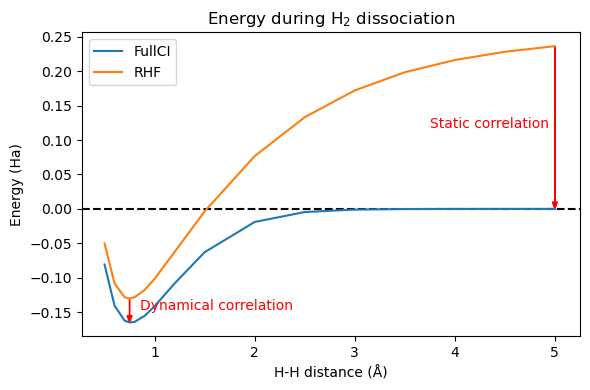

In [3]:
plt.figure(figsize=(6,4))
plt.title('Energy during H$_2$ dissociation')
x = np.array(distlist)
y = np.array(E_FCI)
z = np.array(E_hf)
plt.axhline(y = 0, color = "k", linestyle = 'dashed')
plt.plot(x,y, label='FullCI')
plt.plot(x,z, label='RHF')
plt.arrow(x[3], z[3], 0, y[3]-z[3], length_includes_head = True, head_width = 0.05, head_length = 0.01, facecolor='r', edgecolor='r')
plt.annotate('Dynamical correlation', xy = (x[3]+0.1, 0.5*(z[3]+y[3])), color = 'r')
plt.arrow(x[-1], z[-1], 0, y[-1]-z[-1], length_includes_head = True, head_width = 0.05, head_length = 0.01, facecolor='r', edgecolor='r')
plt.annotate('Static correlation', xy = (x[-1]-1.25, 0.5*(z[-1]+y[-1])), color = 'r')
plt.xlabel("H-H distance (Å)")
plt.ylabel("Energy (Ha)")
plt.legend()
plt.tight_layout(); plt.show()

In [4]:
n=100

norb = space.n_active
origin = np.zeros((n, 3))
coords = np.zeros((n, 3))

def get_orbital_values(coords, molecule, basis, mol_orbs):
    orbital_values = []

    for i in range(norb):
        values = np.array(vis_drv.get_mo(coords, molecule, basis, mol_orbs.alpha_to_numpy(), i))
        orbital_values.append(values)

    return orbital_values
def get_n12(ci_twopart_denmat, orbital_values_1, orbital_values_2): 
    
    hf_twopart_denmat = np.zeros((norb,norb,norb,norb))
    hf_twopart_denmat[0,0,0,0] = 2.0 # first MO is doubly occupied
    # Two-particle densities for FCI
    n12_hf = np.zeros(n)
    n12_fci = np.zeros(n)

    for i in range(norb):
        for j in range(norb):
            for k in range(norb):
                for l in range(norb):
                    
                    n12_hf += (
                        hf_twopart_denmat[i, j, k, l]
                        * orbital_values_1[i]
                        * orbital_values_1[j]
                        * orbital_values_2[k]
                        * orbital_values_2[l]
                    )
                        
                    n12_fci += (
                        ci_twopart_denmat[i, j, k, l]
                        * orbital_values_1[i]
                        * orbital_values_1[j]
                        * orbital_values_2[k]
                        * orbital_values_2[l]
                    )

    return n12_hf, n12_fci

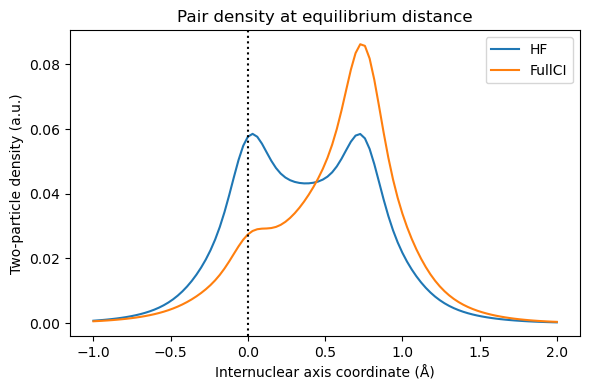

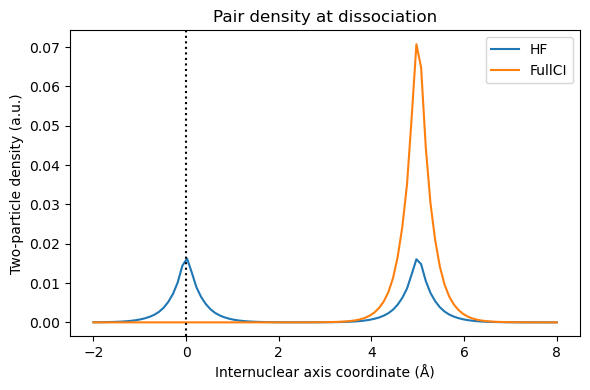

In [5]:
z = np.linspace(-1, 2, n)
coords[:, 2] = z
vis_drv = vlx.VisualizationDriver()

orbital_values = get_orbital_values(coords/bohr_to_Å, eq_molecule, basis, eq_orbitals)
orbital_values_at_H1 = get_orbital_values([[0, 0, 0]], eq_molecule, basis, eq_orbitals)
n12_hf, n12_fci = get_n12(eq_2density, orbital_values_at_H1, orbital_values)

plt.figure(figsize=(6,4))
plt.title('Pair density at equilibrium distance')
plt.plot(z,n12_hf, label='HF')
plt.plot(z,n12_fci, label='FullCI')
plt.axvline(x = 0, color = 'k', linestyle = ':')
plt.xlabel("Internuclear axis coordinate (Å)")
plt.ylabel("Two-particle density (a.u.)")
plt.legend()
plt.tight_layout(); plt.show()

z = np.linspace(-2, 8, n)
coords[:, 2] = z

orbital_values = get_orbital_values(coords/bohr_to_Å, molecule, basis, scf_drv.mol_orbs)
orbital_values_at_H1 = get_orbital_values([[0, 0, 0]], molecule, basis, scf_drv.mol_orbs)
ci_twopart_denmat = ci_drv.get_active_2body_density(0)
n12_hf, n12_fci = get_n12(ci_twopart_denmat, orbital_values_at_H1, orbital_values)

plt.figure(figsize=(6,4))
plt.title('Pair density at dissociation')
plt.plot(z,n12_hf, label='HF')
plt.plot(z,n12_fci, label='FullCI')
plt.axvline(x = 0, color = 'k', linestyle = ':')
plt.xlabel("Internuclear axis coordinate (Å)")
plt.ylabel("Two-particle density (a.u.)")
plt.legend()
plt.tight_layout(); plt.show()

In [6]:
mol_str = """
H  0.000000   0.923274   1.238289
H  0.000000  -0.923274   1.238289
H  0.000000   0.923274  -1.238289
H  0.000000  -0.923274  -1.238289
C  0.000000   0.000000   0.668188
C  0.000000   0.000000  -0.668188
 """

molecule = vlx.Molecule.read_str(mol_str)
molecule.set_charge(0)
molecule.set_multiplicity(1)
basis = vlx.MolecularBasis.read(molecule,"def2-sv(p)")

eht = mtp.OrbitalGuess()
guessorb = eht.compute(molecule,basis)

space = mtp.OrbSpace(molecule,guessorb)
space.cas_orbitals([5,6,8,13])
mcscfdrv = mtp.McscfDriver()
mcresults = mcscfdrv.compute(molecule,basis,space)

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 6
               Number of active orbitals:              4
               Number of virtual orbitals:             26

               This is a CASSCF wavefunction: CAS(4,4)

               CI expansion:
               -------------
               Number of determinants:      36


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
 

        1     -77.869303461     0.0e+00      4.3e-01          0        0.40    0:00:00


        2     -77.989223149    -1.2e-01      6.2e-02          0        0.40    0:00:00


        3     -78.017239558    -2.8e-02      3.7e-03          0        0.48    0:00:00


        4     -78.019223801    -2.0e-03      1.2e-04          0        0.58    0:00:00


        5     -78.019345720    -1.2e-04      1.4e-05          0        0.58    0:00:00


        6     -78.019364402    -1.9e-05      1.8e-06          0        0.69    0:00:00


        7     -78.019366214    -1.8e-06      4.0e-07          0        0.80    0:00:00


        8     -78.019366519    -3.1e-07      3.1e-08          0        0.80    0:00:00


        9     -78.019366537    -1.9e-08      1.7e-09          0        0.80    0:00:00


       10     -78.019366538    -1.1e-09      6.4e-11          0        0.80    0:00:00
** Convergence reached in 10 iterations


       11     -78.019366538    -3.5e-11      3.7e-12          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -78.01936653837473
  - Natural orbitals
1.98365 1.92629 0.07350 0.01656
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.000001 a.u.         0.000001 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000001 a.u.         0.000002 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:02


In [7]:
viewer = mtp.OrbitalViewer()
viewer.plot(molecule, basis, space)

Output()

Dropdown(description='Orbital:', index=7, options=(('  1 occ=2.000 ene=-11.215  (alpha HOMO-7)', 0), ('  2 occ…

Checkbox(value=True, description='Active')

Output()

In [8]:
print(mcresults["natural_occupations"][0])

[1.98365468 1.92628679 0.07349918 0.01655935]


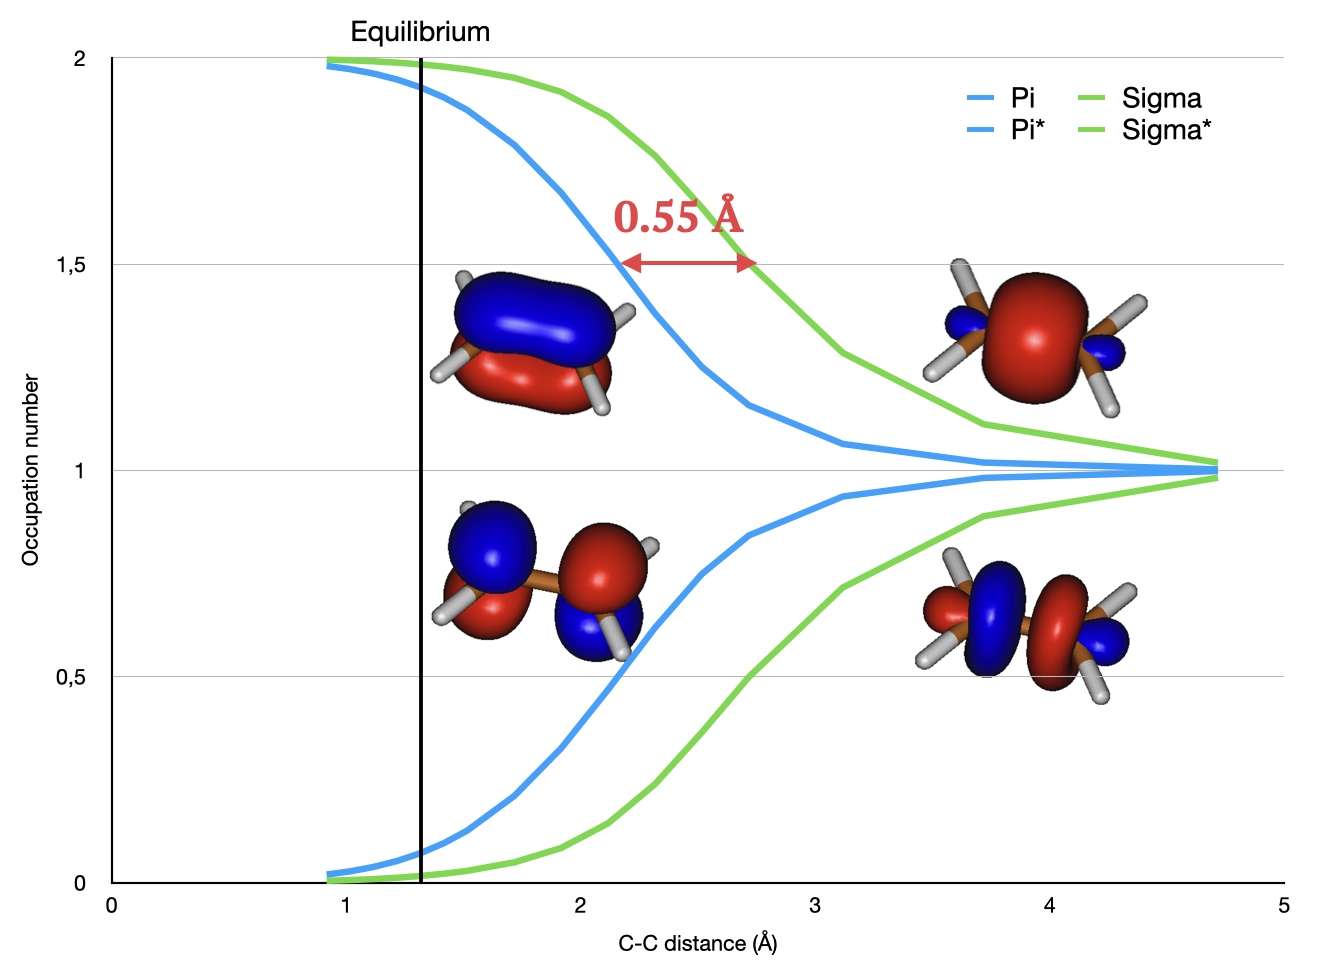

In [9]:
from IPython.display import Image
Image(filename="../../img/tutorials/ethene_bond_breaking.png", width=400)

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\p'
/var/folders/y2/9jwfm_kx7z15xw4ks1hw31rh0000gn/T/ipykernel_52708/1833864943.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(z,sigma, label='$\sigma$')
/var/folders/y2/9jwfm_kx7z15xw4ks1hw31rh0000gn/T/ipykernel_52708/1833864943.py:22: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(z,pi, label='$\pi$')


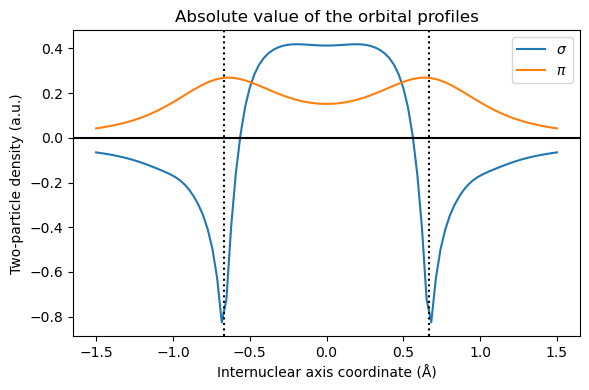

In [10]:
coords = np.zeros((n, 3))
z = np.linspace(-1.5, 1.5, n)
coords[:, 2] = z

coords_shifted = np.zeros((n, 3))
coords_shifted[:, 0] = 0.35 # Pi orbitals are 0 in the xy plane, so we compute them at shifted x value
coords_shifted[:, 2] = z

sigma = np.array(vis_drv.get_mo(coords/bohr_to_Å, molecule, basis, space.molecular_orbitals.alpha_to_numpy(), 6))
pi = np.array(vis_drv.get_mo(coords_shifted/bohr_to_Å, molecule, basis, space.molecular_orbitals.alpha_to_numpy(), 7))

# Make sure the sign is the same in the middle of the bond
sigma*= np.sign(sigma[50])
pi*= np.sign(pi[50])

sigma_max = abs(z[np.argmax(sigma)])
pi_max = abs(z[np.argmax(pi)])

plt.figure(figsize=(6,4))
plt.title('Absolute value of the orbital profiles')
plt.plot(z,sigma, label='$\sigma$')
plt.plot(z,pi, label='$\pi$')
plt.xlabel("Internuclear axis coordinate (Å)")
plt.ylabel("Two-particle density (a.u.)")
plt.axhline(y = 0, color = "k")
plt.axvline(x = 0.668188, color = 'k', linestyle = ':')
plt.axvline(x = -0.668188, color = 'k', linestyle = ':')
plt.legend()
plt.tight_layout(); plt.show()

In [11]:
mol_str = """
B 0.0 0.0 -0.80494
B 0.0 0.0  0.80494
 """

molecule = vlx.Molecule.read_str(mol_str)
molecule.set_charge(0)
molecule.set_multiplicity(3)
basis = vlx.MolecularBasis.read(molecule,"def2-sv(p)")

eht = mtp.OrbitalGuess()
guessorb = eht.compute(molecule,basis)

space = mtp.OrbSpace(molecule,guessorb)
space.cas(6,8)
mcscfdrv = mtp.McscfDriver()
mcresults = mcscfdrv.compute(molecule,basis,space)

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 2
               Number of active orbitals:              8
               Number of virtual orbitals:             18

               This is a CASSCF wavefunction: CAS(6,8)

               CI expansion:
               -------------
               Number of determinants:      1960


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1

        1     -49.135597056     0.0e+00      6.3e-02         10        0.40    0:00:00


        2     -49.158048531    -2.2e-02      4.4e-03         10        0.40    0:00:00


        3     -49.160521340    -2.5e-03      1.2e-04          5        0.48    0:00:00


        4     -49.160599909    -7.9e-05      6.0e-06          6        0.48    0:00:00


        5     -49.160607892    -8.0e-06      6.0e-07          7        0.58    0:00:00


        6     -49.160608598    -7.1e-07      5.5e-08          8        0.69    0:00:00


        7     -49.160608650    -5.2e-08      1.6e-09         10        0.80    0:00:00


        8     -49.160608654    -3.4e-09      1.9e-10         10        0.80    0:00:00
** Convergence reached in 8 iterations


        9     -49.160608655    -8.5e-10      6.3e-11         10        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 2.00  (multiplicity = 3.0 )
  - Energy : -49.1606086547058
  - Natural orbitals
1.96302 1.64312 0.96618 0.96618 0.32574 0.05890 0.05890 0.01795
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                         

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000001 a.u.        -0.000003 Debye                                     
                                   Y   :         0.000004 a.u.         0.000010 Debye                                     
                                   Z   :         0.000036 a.u.         0.000092 Debye                                     
                                 Total :         0.000036 a.u.         0.000092 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:05


In [12]:
print(mcresults["natural_occupations"][0])

[1.96302288 1.6431183  0.9661788  0.96617899 0.32574436 0.058903
 0.05890327 0.0179504 ]
